<div align="center">
  <b> <font size="6">Binary Classification using Logistic Regression</font> </b>
</div>

We will predict whether a person will buy the insurance or not. It is a binary classification problem as there are only two possible outcomes (will buy insurance or not). 

In [227]:
# Import necessary package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

### Step 1: Load the dataset

In [228]:
# Load the dataset into pandas dataframe
df = pd.read_csv("E:\\MY LECTURES\\8.2021-09-03 DATA SCIENCE (KNU)\\3.Programs\\dataset\\insurance_data.csv")     
# Change this location based on the location of dataset in your machine

In [229]:
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


In [230]:
df.shape

(27, 2)

### Step 2: Apply EDA

##### How  many did buy insurance?

In [231]:
bought = df[df.bought_insurance==1]
bought

,age,bought_insurance
2,47,1
4,46,1
5,56,1
7,60,1
8,62,1
9,61,1
14,49,1
15,55,1
16,25,1
17,58,1


##### How  many did not buy insurance?

In [232]:
no_buy = df[df.bought_insurance==0]
no_buy

,age,bought_insurance
0,22,0
1,25,0
3,52,0
6,55,0
10,18,0
11,28,0
12,27,0
13,29,0
18,19,0
19,18,0


##### Average age for people who bought insurance and who did not

In [233]:
df.groupby('bought_insurance').mean()

,age
bought_insurance,
0,27.923077
1,50.571429


##### Impact of age on insurance buy

<AxesSubplot:xlabel='age'>

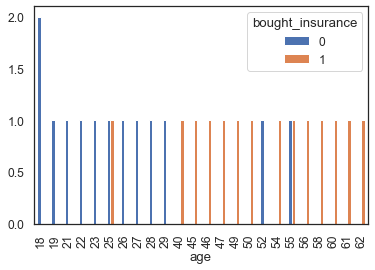

In [234]:
pd.crosstab(df.age,df.bought_insurance).plot(kind='bar')

##### Scatter plot

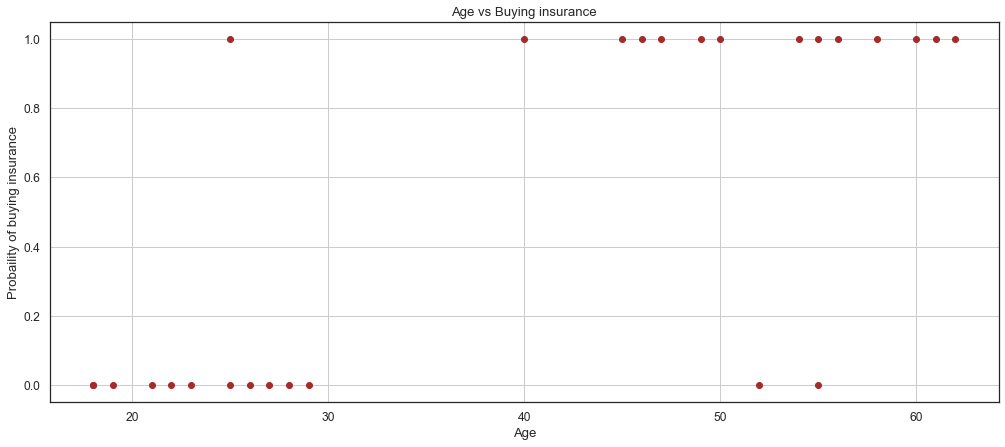

In [235]:
sns.set_style(style='white') 
fig = plt.figure(figsize=(17,7)) 
plt.scatter(df["age"],df["bought_insurance"],color="brown")
plt.grid(b=None)
plt.xlabel("Age")
plt.ylabel("Probaility of buying insurance")
plt.title("Age vs Buying insurance")
plt.show() 

### Step 3. Pre-process and extract the features

In [236]:
X = df.iloc[:,0].values.reshape((-1, 1))    # age
Y = df.iloc[:,1].values                     # bought_insurance

### Step 4. Split the data for training and testing

In [237]:
# Splitting dataset into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
#x_train, x_test, y_train, y_test = train_test_split(df[["age"]],df.bought_insurance, test_size = 0.2, random_state = 0)

<div align="center">
  <b> <font size="5">Linear Regression</font> </b>
</div>

### Step 5. Fitting the model

You may try training and testing separately. To understand the concept, I just bypass it.

In [238]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X, Y)
y_pred = linear_model.predict(X)

##### Visualizing the model

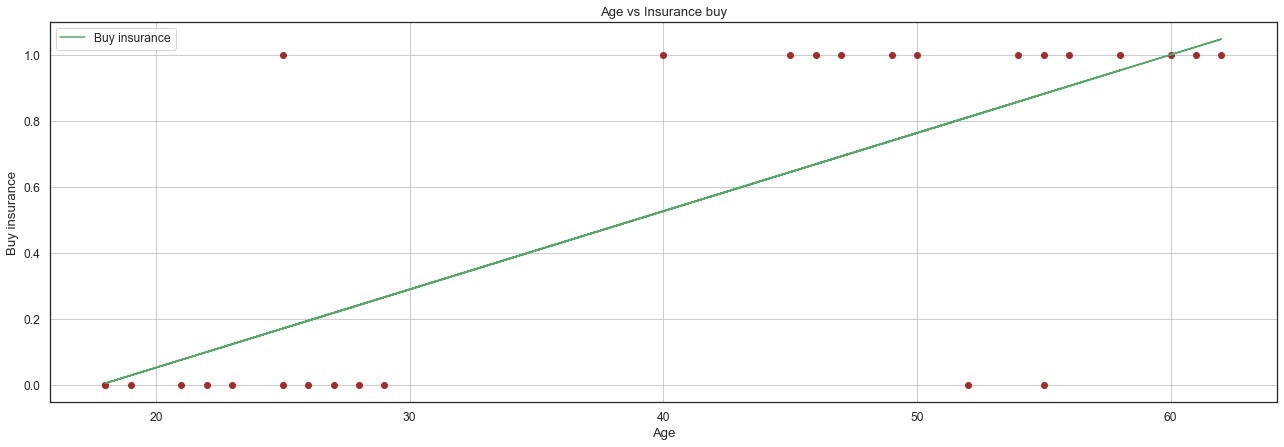

In [239]:
sns.set_style(style='white') 
fig = plt.figure(figsize=(22,7)) 
plt.scatter(X,Y,color="brown")
plt.grid(b=None) 
plt.plot(X,y_pred,"g",label="Buy insurance")
plt.xlabel("Age")
plt.ylabel("Buy insurance")
plt.title("Age vs Insurance buy")
plt.legend()
plt.show()

##### Sum of Squared Error (SSE)

In [240]:
sum = 0   
n = len(X)  
for i in range (0,n):   
  diff = Y[i] - y_pred[i]   
  squ_diff = diff**2   
  sum = sum + squ_diff   
SSE = np.round(sum,2)
print("Sum of Squared Error (SSE) :",SSE)

Sum of Squared Error (SSE) : 3.12


##### Calculating R-Squred value (goodness of model) using SSE

In [241]:
from sklearn.metrics import r2_score
out = r2_score(Y,y_pred)
RS = np.round(out,2)*100
print("R-Squred value (goodness of model) for training set :",RS,"%") 

R-Squred value (goodness of model) for training set : 54.0 %


##### The possible solution with linear regression

Find the center of regression and impose the following condition
<ul>
  <li>predicted value for an input greater than 0.5 will buy insurance.</li>
  <li>predicted value for an input less than 0.5 will not buy insurance.</li> 
</ul> 

In [242]:
# Finding the center
X_center = np.mean(X)
Y_center = np.mean(Y)

In [243]:
X_axis = np.full(len(X),np.mean(Y_center)).reshape(-1,1)  

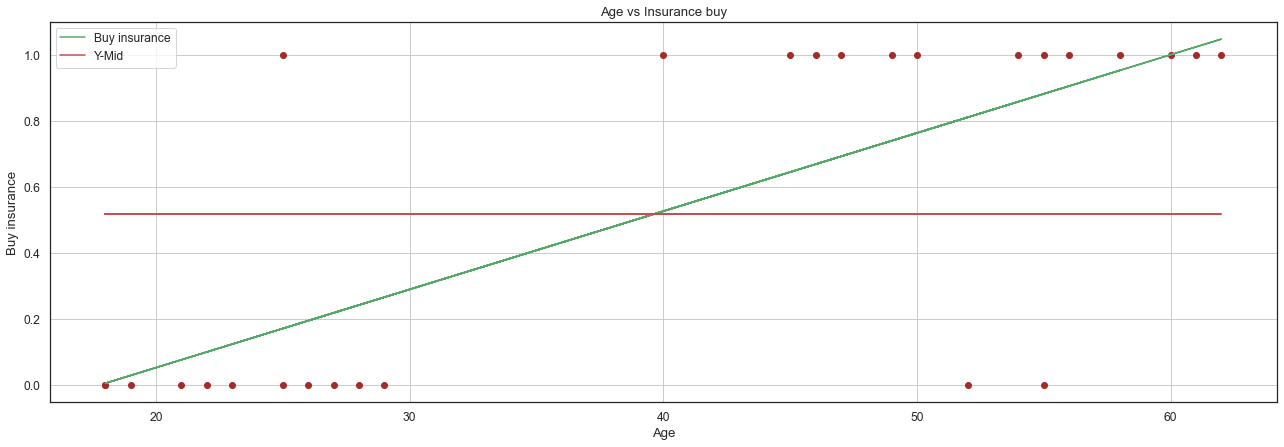

In [244]:
sns.set_style(style='white') 
fig = plt.figure(figsize=(22,7)) 
plt.scatter(X,Y,color="brown")
plt.grid(b=None) 
plt.plot(X,y_pred,"g",label="Buy insurance")
plt.plot(X,X_axis,"r",label="Y-Mid")  
plt.xlabel("Age")
plt.ylabel("Buy insurance")
plt.title("Age vs Insurance buy")
plt.legend()
plt.show()

<div align="center">
  <b> <font size="5">Logistic (Sigmoid) Regression</font> </b>
</div>

##### Which model (function) is suitable for such data that contains only two categories (0 and 1)?

\begin{equation}
Logistic (sigmoid)  function = \frac{1}{1+e^{-x}}  or  \frac{e^{x}}{1+e^{x}} 
\end{equation} 

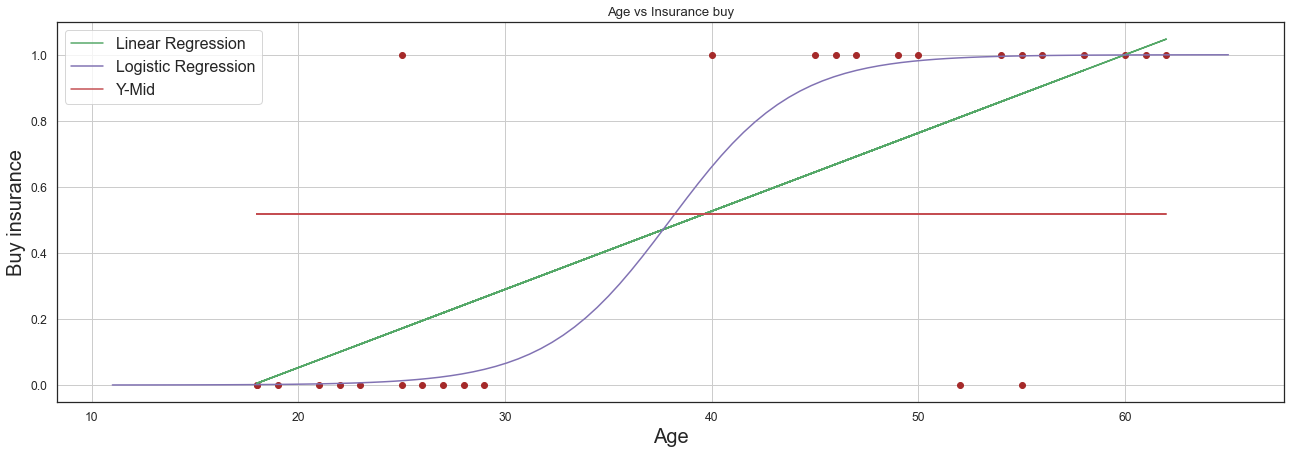

In [245]:
sns.set_style(style='white') 

fig = plt.figure(figsize=(22,7)) 
plt.scatter(X,Y,color="brown")
plt.grid(b=None) 

numbers = np.linspace(-9,9,100) 
# logistic (sigmoid) function
logit = 1/(1+np.e**-numbers) 
numbers = numbers * 3
numbers = numbers + 38

plt.plot(X,y_pred,"g",label="Linear Regression")
plt.plot(numbers,logit,"m",label="Logistic Regression")
plt.plot(X,X_axis,"r",label="Y-Mid")

plt.xlabel("Age")
plt.ylabel("Buy insurance")
plt.title("Age vs Insurance buy")

axes = plt.gca()
axes.xaxis.label.set_size(20)
axes.yaxis.label.set_size(20)
plt.legend(prop={"size":16})

plt.show()

### Step 5. Training the model

##### Fitting the model

In [246]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

LogisticRegression()

In [247]:
logistic_model.coef_     # slope for each feature in log(odds graph)

array([[0.11216016]])

In [248]:
y_train_pred = logistic_model.predict(x_train) 
y_train_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0],
      dtype=int64)

##### Logistic regression results either 0 or 1 but what could be the calculated value before rounding?

In [249]:
train_predicted_prob = logistic_model.predict_proba(x_train.reshape(-1,1))
train_predicted_prob

array([[0.39231295, 0.60768705],
       [0.79526555, 0.20473445],
       [0.9302622 , 0.0697378 ],
       [0.90501595, 0.09498405],
       [0.85882961, 0.14117039],
       [0.85882961, 0.14117039],
       [0.9302622 , 0.0697378 ],
       [0.8839032 , 0.1160968 ],
       [0.19045729, 0.80954271],
       [0.08751808, 0.91248192],
       [0.17376122, 0.82623878],
       [0.36592002, 0.63407998],
       [0.92262534, 0.07737466],
       [0.09689922, 0.90310078],
       [0.10716783, 0.89283217],
       [0.53076125, 0.46923875],
       [0.22745791, 0.77254209],
       [0.89492668, 0.10507332],
       [0.84467638, 0.15532362],
       [0.17376122, 0.82623878],
       [0.82938609, 0.17061391]])

First column is 0 (will not buy), second column is 1 (will buy insurance) for each record<br>
Look at the next cell for the input of following output

In [250]:
print("x_train    y_train    y_train_pred")
for i in range(0,len(x_train)):
    print(x_train[i],"       ",y_train[i],"           ",y_train_pred[i])
# 1 - bought insurance, 0 - did not buy insurance

x_train    y_train    y_train_pred
[45]         1             1
[29]         0             0
[18]         0             0
[21]         0             0
[25]         1             0
[25]         0             0
[18]         0             0
[23]         0             0
[54]         1             1
[62]         1             1
[55]         0             1
[46]         1             1
[19]         0             0
[61]         1             1
[60]         1             1
[40]         1             0
[52]         0             1
[22]         0             0
[26]         0             0
[55]         1             1
[27]         0             0


##### Visualizing the model

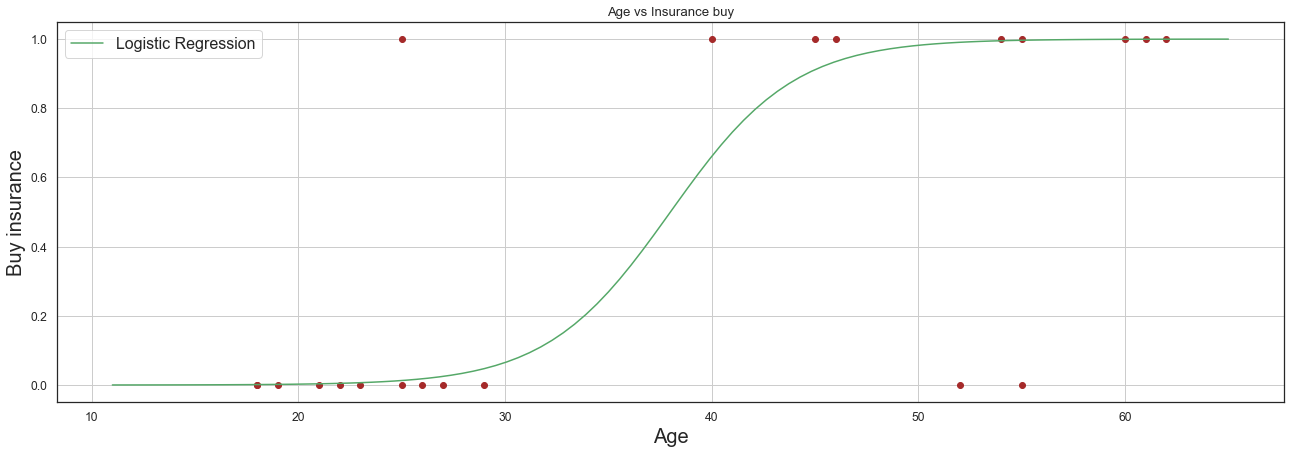

In [251]:
sns.set_style(style='white') 
fig = plt.figure(figsize=(22,7)) 
plt.scatter(x_train,y_train,color="brown")
plt.grid(b=None)  


numbers = np.linspace(-9,9,100) 
logit = 1/(1+np.e**-numbers) 
numbers = numbers * 3
numbers = numbers + 38

plt.plot(numbers,logit,"g",label="Logistic Regression")

plt.xlabel("Age")
plt.ylabel("Buy insurance")
plt.title("Age vs Insurance buy")

axes = plt.gca()
axes.xaxis.label.set_size(20)
axes.yaxis.label.set_size(20)
plt.legend(prop={"size":16}) 

plt.show()

The above graph is just an assumption. Because, we do not get any value for the parameters in logistic function, instead the problem is solved in log(odds) graph that results the value for slope and intercept.

##### Performance score for logistic regression

In [252]:
out = logistic_model.score(x_train,y_train)
Logistic_Train_RS = np.round(out,2)*100
print("Performance score for training set :",Logistic_Train_RS,"%") 

Performance score for training set : 81.0 %


Score says the performance of logistic regression over simple probability that does not feature Age. 

##### Confusion matrix

We are interested to know how many has been correctly and wrongly classified.

Text(19.5, 0.5, 'Truth')

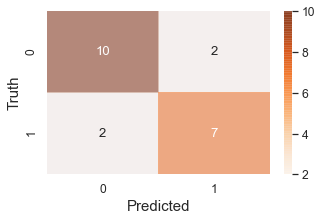

In [253]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train,y_train_pred) 

plt.figure(figsize = (5,3))
sns.set(font_scale=1.1)

axes = plt.gca()
axes.xaxis.label.set_size(15)
axes.yaxis.label.set_size(15) 

sns.heatmap(cm, annot=True,cmap=plt.cm.Oranges, alpha=0.5)

plt.xlabel('Predicted')
plt.ylabel('Truth')

##### Precison, Recall, F1, Accuracy

In [254]:
# Total report
from sklearn import metrics
print(metrics.classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.78      0.78      0.78         9

    accuracy                           0.81        21
   macro avg       0.81      0.81      0.81        21
weighted avg       0.81      0.81      0.81        21



In [255]:
# Accuracy score
temp = metrics.accuracy_score(y_train,y_train_pred)
Logistic_Train_Accuracy = np.round(temp,2)*100
print("Accuracy score : ",Logistic_Train_Accuracy,"%")

Accuracy score :  81.0 %


In [256]:
# Precision score
temp = metrics.precision_score(y_train,y_train_pred)
Logistic_Train_Precision = np.round(temp,2)*100
print("Precision score : ",Logistic_Train_Precision,"%")

Precision score :  78.0 %


In [257]:
# Recall score
temp = metrics.recall_score(y_train,y_train_pred)
Logistic_Train_Recall = np.round(temp,2)*100
print("Recall score : ",Logistic_Train_Recall,"%")

Recall score :  78.0 %


In [258]:
# F1 score
temp = metrics.f1_score(y_train,y_train_pred)
Logistic_Train_F1 = np.round(temp,2)*100
print("F1 score : ",Logistic_Train_F1,"%")

F1 score :  78.0 %


In [259]:
# Cohen Kappa score
temp = metrics.cohen_kappa_score(y_train,y_train_pred)
Logistic_Train_CK = np.round(temp,2)*100
print("Cohen Kappa score : ",Logistic_Train_CK,"%")

Cohen Kappa score :  61.0 %


##### ROC and AUC

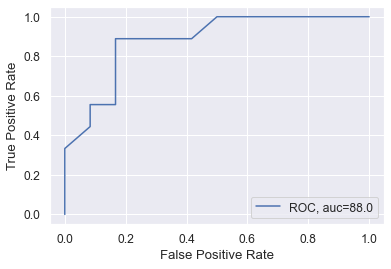

In [260]:
prob = train_predicted_prob[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train, prob)
Logistic_Train_AUC = np.round(metrics.roc_auc_score(y_train, prob),2)*100
plt.plot(fpr,tpr,label="ROC, auc="+str(Logistic_Train_AUC))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

### Step 6. Testing the model

In [261]:
# Predicting values for test input set
y_test_pred = logistic_model.predict(x_test)
y_test_pred

array([1, 1, 1, 1, 1, 0], dtype=int64)

##### Logistic regression results either 0 or 1 but what could be the calculated value before rounding?

First columns is 0 (will not buy), second column is 1 (will buy insurance) <br>
Look at the next cell for the input of following output

In [262]:
test_predicted_prob = logistic_model.predict_proba(x_test.reshape(-1,1))
test_predicted_prob

array([[0.34030833, 0.65969167],
       [0.26925593, 0.73074407],
       [0.2918862 , 0.7081138 ],
       [0.13059794, 0.86940206],
       [0.15824269, 0.84175731],
       [0.81292397, 0.18707603]])

In [263]:
print("x_test    y_test    y_test_pred")
for i in range(0,len(x_test)):
    print(x_test[i],"       ",y_test[i],"           ",y_test_pred[i])
# 1 - bought insurance, 0 - did not buy insurance

x_test    y_test    y_test_pred
[47]         1             1
[50]         1             1
[49]         1             1
[58]         1             1
[56]         1             1
[28]         0             0


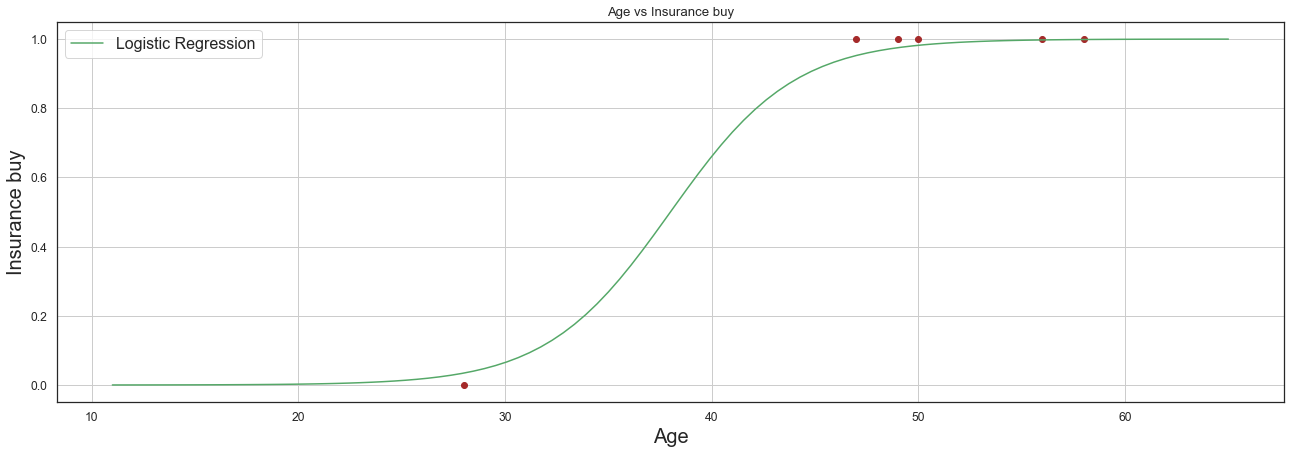

In [264]:
# Plotting the predicted values
sns.set_style(style='white') 
fig = plt.figure(figsize=(22,7)) 
plt.scatter(x_test,y_test,color="brown")
plt.grid(b=None) 

numbers = np.linspace(-9,9,100) 
logit = 1/(1+np.e**-numbers) 
numbers = numbers * 3
numbers = numbers + 38

plt.plot(numbers,logit,"g",label="Logistic Regression")

plt.xlabel("Age")
plt.ylabel("Insurance buy")
plt.title("Age vs Insurance buy")

axes = plt.gca()
axes.xaxis.label.set_size(20)
axes.yaxis.label.set_size(20)
plt.legend(prop={"size":16})

plt.show()

The above graph is just an assumption. Because, we do not get any value for the parameters in logistic function, instead the problem is solved in log(odds) graph that results the value for slope and intercept.

##### Performance score for logistic regression

In [265]:
out = logistic_model.score(x_test,y_test)
Logistic_Test_RS = np.round(out,2)*100
print("Performance score for training set :",Logistic_Test_RS,"%") 

Performance score for training set : 100.0 %


##### Confusion matrix

R2 score says the performance of logistic regression over simple probability that does not feature Age. <br>
We are interested to know how many has been correctly and wrongly classified.

Text(19.5, 0.5, 'Truth')

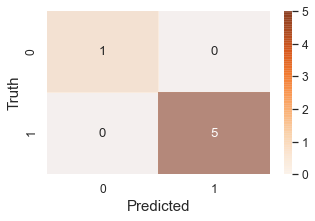

In [266]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_test_pred)

plt.figure(figsize = (5,3))
sns.set(font_scale=1.1)

axes = plt.gca()
axes.xaxis.label.set_size(15)
axes.yaxis.label.set_size(15) 

sns.heatmap(cm, annot=True,cmap=plt.cm.Oranges, alpha=0.5)

plt.xlabel('Predicted')
plt.ylabel('Truth')

##### Precison, Recall, F1, Accuracy

In [267]:
# Total report
from sklearn import metrics
print(metrics.classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         5

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [268]:
# Accuracy score
temp = metrics.accuracy_score(y_test,y_test_pred)
Logistic_Test_Accuracy = np.round(temp,2)*100
print("Accuracy score : ",Logistic_Test_Accuracy,"%")

Accuracy score :  100.0 %


In [269]:
# Precision score
temp = metrics.precision_score(y_test,y_test_pred)
Logistic_Test_Precision = np.round(temp,2)*100
print("Precision score : ",Logistic_Test_Precision,"%")

Precision score :  100.0 %


In [270]:
# Recall score
temp = metrics.recall_score(y_test,y_test_pred)
Logistic_Test_Recall = np.round(temp,2)*100
print("Recall score : ",Logistic_Test_Recall,"%")

Recall score :  100.0 %


In [271]:
# F1 score
temp = metrics.f1_score(y_test,y_test_pred)
Logistic_Test_F1 = np.round(temp,2)*100
print("F1 score : ",Logistic_Test_F1,"%")

F1 score :  100.0 %


In [272]:
# Cohen Kappa score
temp = metrics.cohen_kappa_score(y_test,y_test_pred)
Logistic_Test_CK = np.round(temp,2)*100
print("Cohen Kappa score : ",Logistic_Test_CK,"%")

Cohen Kappa score :  100.0 %


##### ROC and AUC

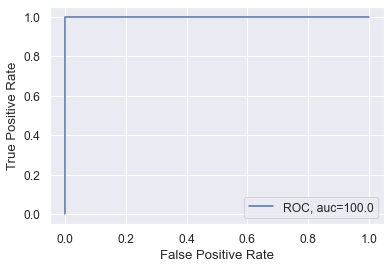

In [273]:
prob = test_predicted_prob[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, prob)
Logistic_Test_AUC = np.round(metrics.roc_auc_score(y_test, prob),2)*100
plt.plot(fpr,tpr,label="ROC, auc="+str(Logistic_Test_AUC))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

### Step 7. Prediction using the model 

In [274]:
# Predict whether person with age 25 will buy insurance or not?
logistic_model.predict([[25]])

array([0], dtype=int64)

In [275]:
logistic_model.predict_proba([[25]])    # he will not buy 85% of the time

array([[0.85882961, 0.14117039]])

In [276]:
# Predict whether person with age 52 will buy insurance or not?
logistic_model.predict([[52]])

array([1], dtype=int64)

In [277]:
logistic_model.predict_proba([[52]])  # he will buy 77% of the time

array([[0.22745791, 0.77254209]])

### Step 8. Summary

In [278]:
print("             Logistic Regression      ")
print("====================================================")
print("\t\tTraining phase       Testing phase ")
print("====================================================")
print("RS\t\t   ",Logistic_Train_RS,"%\t\t", Logistic_Test_RS,"%") 
print("Accuracy\t   ",Logistic_Train_Accuracy,"%\t\t", Logistic_Test_Accuracy,"%") 
print("Precision\t   ",Logistic_Train_Precision,"%\t\t", Logistic_Test_Precision,"%") 
print("Recall\t\t   ",Logistic_Train_Recall,"%\t\t", Logistic_Test_Recall,"%") 
print("F1\t\t   ",Logistic_Train_F1,"%\t\t", Logistic_Test_F1,"%") 
print("CK\t\t   ",Logistic_Train_CK,"%\t\t", Logistic_Test_CK,"%") 
print("AUC\t\t   ",Logistic_Train_AUC,"%\t\t", Logistic_Test_AUC,"%") 
print("====================================================")

             Logistic Regression      
		Training phase       Testing phase 
RS		    81.0 %		 100.0 %
Accuracy	    81.0 %		 100.0 %
Precision	    78.0 %		 100.0 %
Recall		    78.0 %		 100.0 %
F1		    78.0 %		 100.0 %
CK		    61.0 %		 100.0 %
AUC		    88.0 %		 100.0 %


<h2 style="color:purple">Exercise</h2>

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics. 
1. Now do some EDA to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

You may consider the following input and output feature, if you did not any idea EDA.  <br>
input feature: satisfaction_level, average_montly_hours, promotion_last_5years, salary <br>
output feature : left	